Max TRE : 40.61 kW  @ 2025-01-17 08:00:00
Min TRE : 0.00 kW  @ 2025-01-10 00:00:00


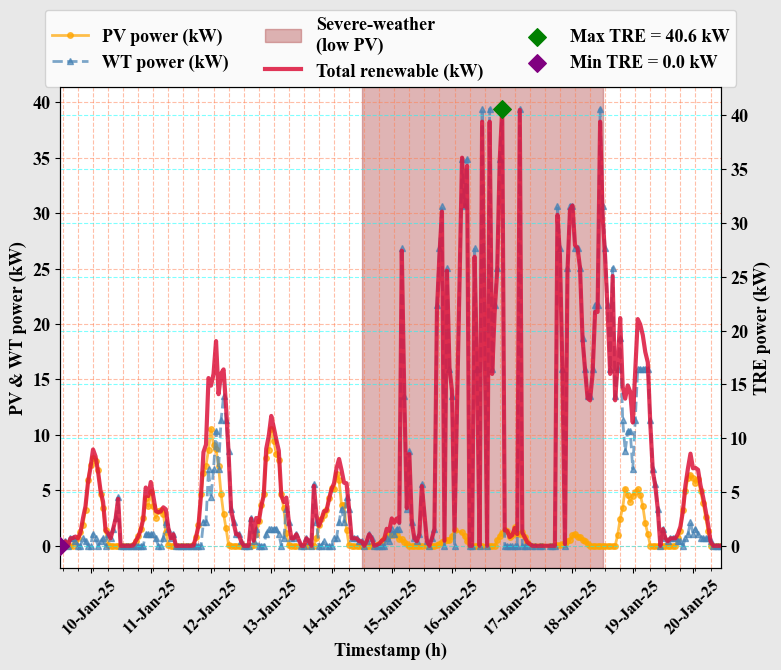

In [3]:
"""
Wollongong Renewable Power Mix (10 – 20 Jan 2025) — Time-Series Plot
--------------------------------------------------------------------
Creates a merged DataFrame with

    Timestamp | PV_kW | WT_kW | TRE_kW   (TRE = PV + WT)

and produces a publication-style PNG that follows the exact aesthetic
you provided:

* Primaries (left y-axis)      : PV_kW, WT_kW
* Secondary (right y-axis)     : TRE_kW
* Extras                       : 6 h grid, shaded severe-weather window
                                 (15 → 18 Jan), max/min TRE markers,
                                 Times-bold fonts, legend centred above,
                                 square-ish 8 × 7-inch canvas.
"""

# ---------------------------------------------------------------------
# 0 · Imports & Global Style
# ---------------------------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates  as mdates
from matplotlib.colors  import to_rgba

plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size"  : 13,
    "font.weight": "bold"
})

# ---------------------------------------------------------------------
# 1 · Merge solar and wind CSVs  →  df  (index = Timestamp)
# ---------------------------------------------------------------------
pv_df = pd.read_csv(
    r"Data\Test\PowerGeneration_Solar__10_20_Jan_2025.csv",
    parse_dates=["Timestamp"]
)[["Timestamp", "PV_kW"]]

wt_df = pd.read_csv(
    r"Data\Test\PowerGeneration_Wind__10_20_Jan_2025.csv",
    parse_dates=["Timestamp"]
)[["Timestamp", "WT_kW"]]

df = (
    pd.merge(pv_df, wt_df, on="Timestamp", how="outer")
      .fillna(0.0)
      .sort_values("Timestamp")
      .set_index("Timestamp")
)
df["TRE_kW"] = df["PV_kW"] + df["WT_kW"]

# ---------------------------------------------------------------------
# 2 · Locate max / min total-renewable power
# ---------------------------------------------------------------------
t_max, p_max = df["TRE_kW"].idxmax(), df["TRE_kW"].max()
t_min, p_min = df["TRE_kW"].idxmin(), df["TRE_kW"].min()

# ---------------------------------------------------------------------
# 3 · Figure (square-ish 8 × 7 in) & Primary Axis
# ---------------------------------------------------------------------
fig, ax1 = plt.subplots(figsize=(8, 7))          #  ← matches your spec

# PV curve
ax1.plot(df.index, df["PV_kW"],
         color="orange", linewidth=2, marker="o", markersize=4, alpha=0.7,
         label="PV power (kW)")

# Wind curve
ax1.plot(df.index, df["WT_kW"],
         color="steelblue", linewidth=2, linestyle="--",
         marker="^", markersize=4, alpha=0.7,
         label="WT power (kW)")

ax1.set_ylabel("PV & WT power (kW)", fontweight="bold")

# ---------------------------------------------------------------------
# 4 · Secondary Axis  →  Total Renewable Electricity
# ---------------------------------------------------------------------
ax2 = ax1.twinx()
ax2.plot(df.index, df["TRE_kW"],
         color="crimson", linewidth=3, alpha=0.85,
         label="Total renewable (kW)")

# Max / Min markers
ax2.scatter([t_max], [p_max], color="green",  s=80, zorder=5,
            marker="D", label=f"Max TRE = {p_max:.1f} kW")
ax2.scatter([t_min], [p_min], color="purple", s=80, zorder=5,
            marker="D", label=f"Min TRE = {p_min:.1f} kW")

ax2.set_ylabel("TRE power (kW)", fontweight="bold")

# ---------------------------------------------------------------------
# 5 · X-axis ticks, grids, limits
# ---------------------------------------------------------------------
ax1.set_xlabel("Timestamp (h)", fontweight="bold")

ax1.xaxis.set_major_locator(mdates.HourLocator(byhour=12))          # daily label at ~mid-day
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%d-%b-%y"))
ax1.xaxis.set_minor_locator(mdates.HourLocator(interval=6))         # every 6 h
ax1.tick_params(axis="x", rotation=45, labelsize=12)

# Grids
ax1.grid(which="minor", axis="x", linestyle="--", color="coral", alpha=0.5)
ax1.grid(which="major", axis="y", linestyle="--", color="coral", alpha=0.5)
ax2.grid(which="major", axis="y", linestyle="--", color="cyan" , alpha=0.5)

# X-axis window (10 Jan 00:00 → 20 Jan 23:00)
ax1.set_xlim(pd.Timestamp("2025-01-10 00:00"),
             pd.Timestamp("2025-01-20 23:00"))

# ---------------------------------------------------------------------
# 6 · Shaded severe-weather period  (15 → 18 Jan)
# ---------------------------------------------------------------------
ax1.axvspan(pd.Timestamp("2025-01-15 00:00"),
            pd.Timestamp("2025-01-18 23:59"),
            color="brown", alpha=0.35,
            label="Severe-weather\n(low PV)")

# ---------------------------------------------------------------------
# 7 · Combined legend centred above axes
# ---------------------------------------------------------------------
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
           loc="upper center", bbox_to_anchor=(0.5, 1.18),
           ncol=3, frameon=True)

# ---------------------------------------------------------------------
# 8 · Light-gray canvas for print readability
# ---------------------------------------------------------------------
fig.patch.set_facecolor(to_rgba("lightgray", 0.50))

# ---------------------------------------------------------------------
# 9 · Export
# ---------------------------------------------------------------------
plt.tight_layout()
fig.savefig("Figures/Wollongong_Renewables_10_20_Jan_2025.png",
            dpi=600, bbox_inches="tight")

# Console summary
print(f"Max TRE : {p_max:.2f} kW  @ {t_max}")
print(f"Min TRE : {p_min:.2f} kW  @ {t_min}")